In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn import datasets


In [2]:
x = np.arange(0,500)
y = 7*x**2 +3*x +12 + np.random.uniform(-5e4,5e4,(500,))

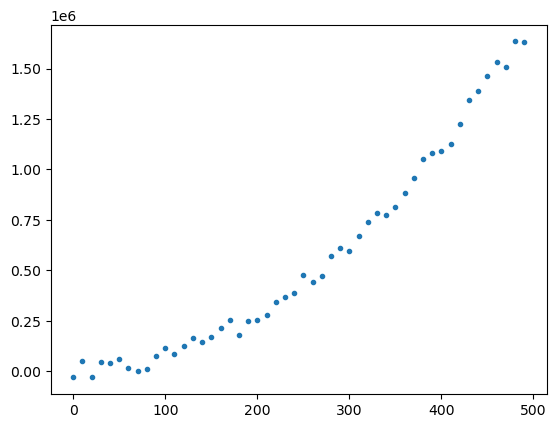

In [3]:
plt.scatter(x[::10],y[::10],marker='.')
plt.show()

In [4]:
model = LinearRegression()

In [5]:
model.fit(x.reshape(-1,1),y)

LinearRegression()

In [6]:
model.coef_,model.intercept_

(array([3495.0598382]), -289350.32208549744)

In [7]:
p = model.predict(x.reshape(-1,1))

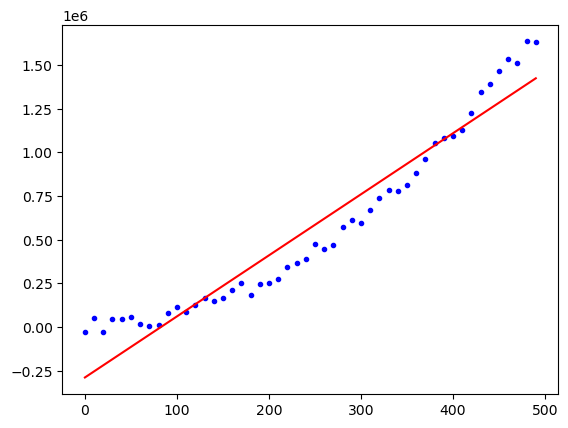

In [8]:
plt.scatter(x[::10],y[::10],c='b',marker='.')
plt.plot(x[::10],p[::10],c='r')
plt.show()

In [9]:
model.score(x.reshape(-1,1),y)

0.9356782175640617

In [10]:
mean_absolute_error(y,p)

113314.5140407483

----

$ f(x) = \alpha x + \beta $

$ f(x) = \alpha_1 x^2 + \alpha_2 X + \beta  $

$ f(x) = \alpha_1 x_2 + \alpha_2 X_2 + \beta  $

In [11]:
df = pd.DataFrame({'X':x})
df

,X
0,0
1,1
2,2
3,3
4,4
...,...
495,495
496,496
497,497
498,498


In [12]:
df = pd.DataFrame({'X1':x,'X2':x**2})
df

,X1,X2
0,0,0
1,1,1
2,2,4
3,3,9
4,4,16
...,...,...
495,495,245025
496,496,246016
497,497,247009
498,498,248004


In [13]:
model = LinearRegression()
model.fit(df.values,y)

LinearRegression()

In [14]:
model.coef_,model.intercept_

(array([41.3093887 ,  6.92134359]), -2689.0347769206855)

In [15]:
model.score(df.values,y)

0.9968343350865997

In [16]:
p = model.predict(df.values)

In [17]:
mean_absolute_error(y,p)

25343.12062413396

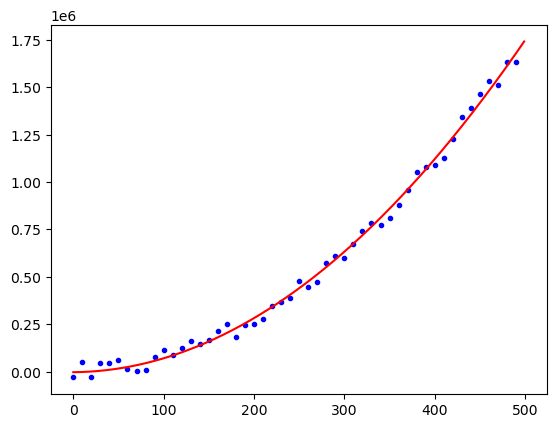

In [18]:
plt.scatter(x[::10],y[::10],c='b',marker='.')
plt.plot(x,p,c='r')
plt.show()

## Polynomial Feature

In [19]:
from sklearn.preprocessing import PolynomialFeatures

In [21]:
poly = PolynomialFeatures(degree=2)
poly.fit(x.reshape(-1,1))
X_p = poly.transform(x.reshape(-1,1))
X_p

# ردیف 1 همش یک
# ستون 2 عدد
# ستون 3 به توان 2

array([[1.00000e+00, 0.00000e+00, 0.00000e+00],
       [1.00000e+00, 1.00000e+00, 1.00000e+00],
       [1.00000e+00, 2.00000e+00, 4.00000e+00],
       ...,
       [1.00000e+00, 4.97000e+02, 2.47009e+05],
       [1.00000e+00, 4.98000e+02, 2.48004e+05],
       [1.00000e+00, 4.99000e+02, 2.49001e+05]])

In [22]:
#fit_intercept=False  عرض از مبدا رو حساب کنه

model = LinearRegression(fit_intercept=False)
model.fit(X_p,y)

LinearRegression(fit_intercept=False)

In [23]:
model.score(X_p,y)

0.9968343350865997